# Visualizing Earnings By College Majors
In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 36 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows contain null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')
recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])
print( )
print(recent_grads.head())
print( )
print(recent_grads.tail())

recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

   Rank  M

## Pandas, Scatter Plots

Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis. 

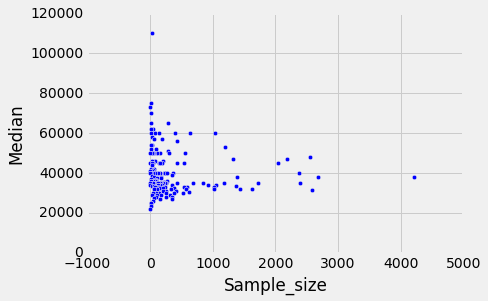

In [2]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
plt.show()

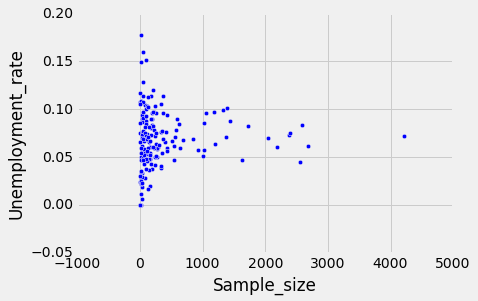

In [3]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
plt.show()

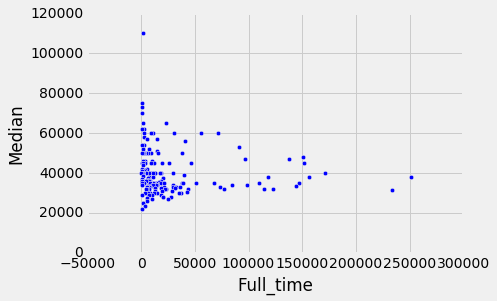

In [4]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
plt.show()

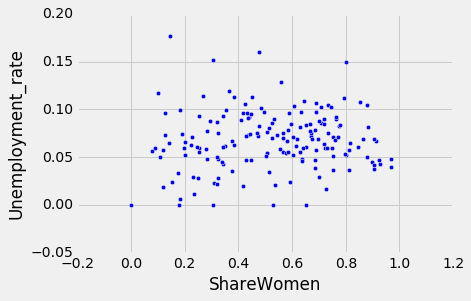

In [5]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
plt.show()

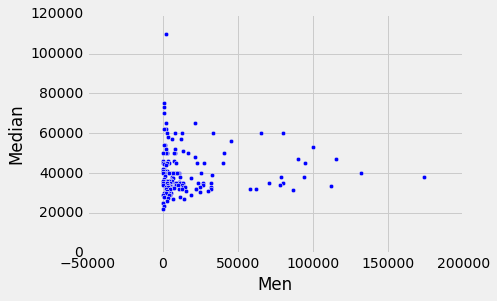

In [6]:
recent_grads.plot(x='Men', y='Median', kind='scatter')
plt.show()

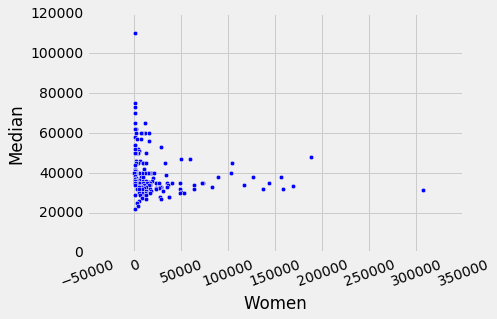

In [7]:
recent_grads.plot(x='Women', y='Median', kind='scatter', rot=20)
plt.show()

- Do students in more popular majors make more money?

No correlation exists in the first plot. This would indicate that it does not lead to a better salary. 

- Do students that majored in subjects that were majority female make more money?

It seems that it is a little lower than for men in the two previous scatter plots.

## Pandas And Histograms
The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

Unfortunately, Series.plot() doesn't contain parameters for tweaking a histogram because it was implemented to handle generating standard plots with default settings quickly. If we want to control the binning strategy of a histogram, we should use Series.hist() instead, which contains parameters specific to customizing histograms:

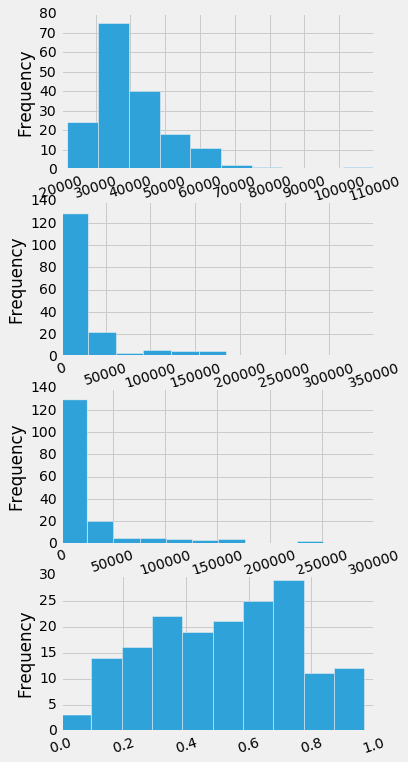

In [8]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=18)

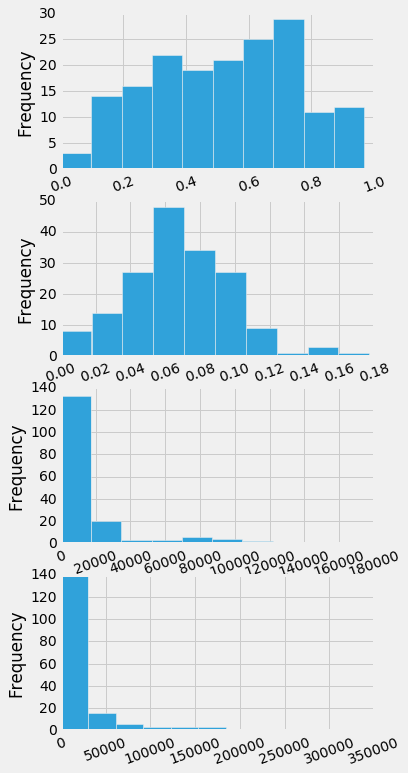

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=20)

## Pandas, Scatter Matrix Plot
A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

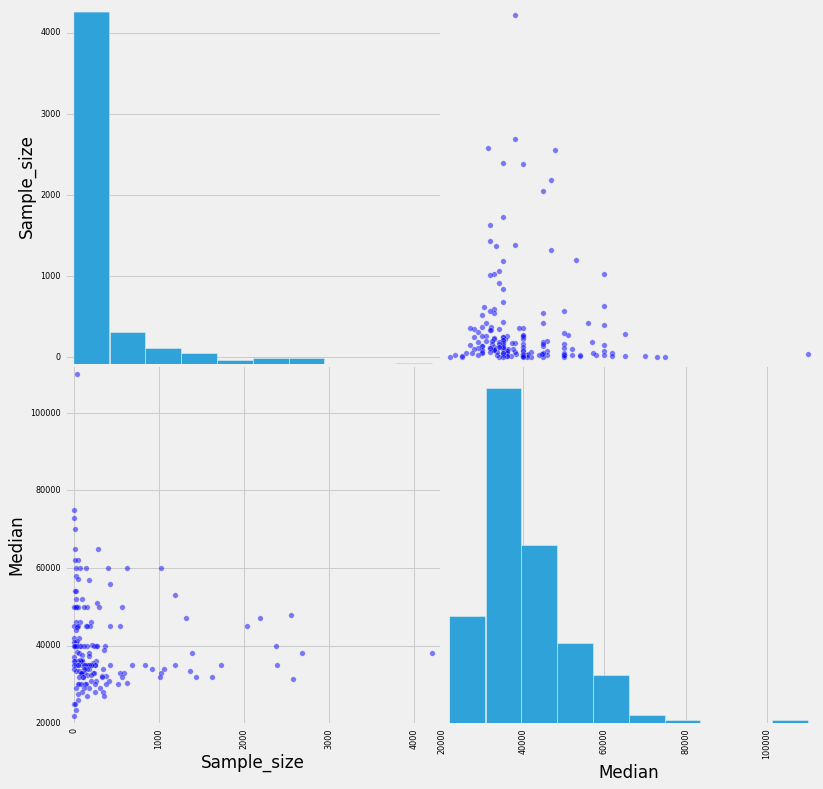

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(12,12), s=120)
plt.show()

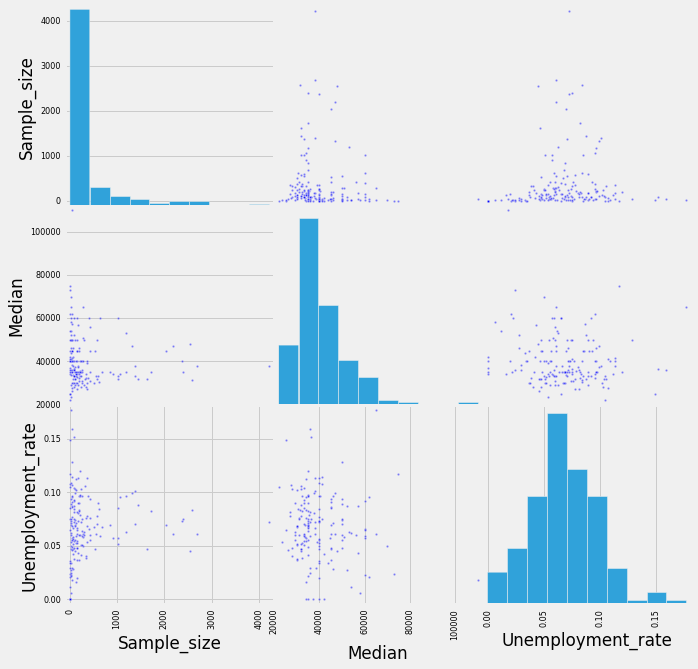

In [11]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
plt.show()

# Pandas And Bar Plots
To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. 

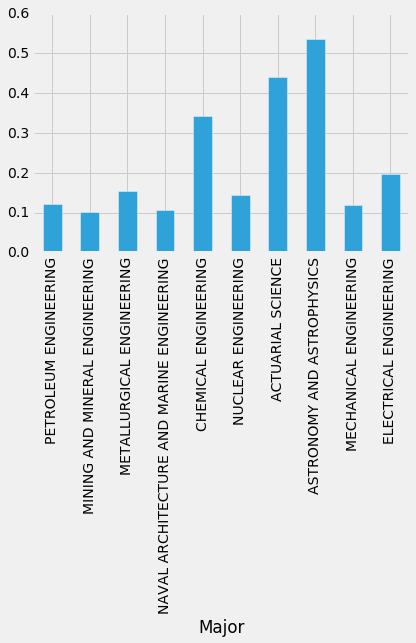

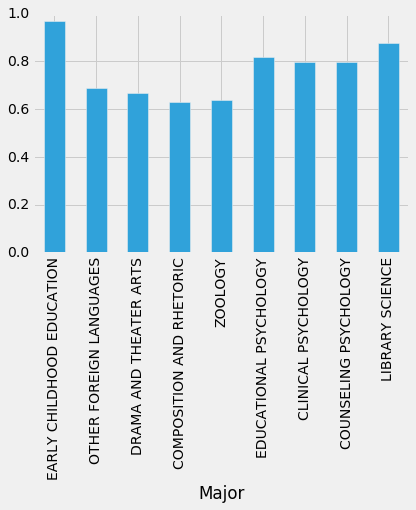

In [12]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.show()

## Next steps

Here are some ideas:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

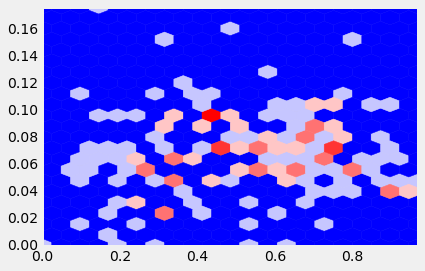

In [20]:
plt.hexbin(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'], gridsize=20, bins='log', cmap='bwr')
plt.show()